In [264]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

%matplotlib inline

In [265]:
 # setup logger
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
    
# get logger
logger = logging.getLogger(__name__)

In [266]:
# Check if interactive plot is enabled, if not enable it.

logger.info('Checking Interactive session')
    
if plt.isinteractive():
    print("Plotting is not interactive, Setting it to interactive mode ...")
    plt.interactive(True)
else:
    print("Plotting is already interactive")

2019-01-15 14:12:56,034 - __main__ - INFO - Checking Interactive session


Plotting is not interactive, Setting it to interactive mode ...


In [267]:
plt.isinteractive()

True

In [268]:
#!pip install kaggle

#Open git bash and run following command to download the data sets:

export KAGGLE_USERNAME="username" <br>
export KAGGLE_KEY="api_key" <br>
kaggle datasets list -s titanic

kaggle competitions download -c titanic

In [269]:
#Read titanic datasets

logger.info('Reading the titanic datasets')

train_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\titanic\train.csv",index_col="PassengerId")
test_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\titanic\test.csv",index_col="PassengerId")

2019-01-15 14:12:56,397 - __main__ - INFO - Reading the titanic datasets


In [270]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable	Definition  	Key
survival:	Survival	    0 = No, 1 = Yes
pclass	:   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	    :   Sex	
Age	    :   Age in years	
sibsp	:   # of siblings / spouses aboard the Titanic	
parch	:   # of parents / children aboard the Titanic	
ticket	:   Ticket number	
fare	:   Passenger fare	
cabin	:    Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [271]:
#Generic function to count the number of rows and columns in train and test datasets

def file_count(dataset,typ):
    rows, columns = dataset.shape
    print("There are {0} rows in {1} dataset".format(rows,typ))
    print("There are {0} columns in {1} dataset\n".format(columns,typ))

#Invoke the function by passing the dataset name and the type of file
file_count(train_dataset,"training")
file_count(test_dataset,"test")

There are 891 rows in training dataset
There are 11 columns in training dataset

There are 418 rows in test dataset
There are 10 columns in test dataset



In [272]:
#get the list of columns
type(train_dataset)

pandas.core.frame.DataFrame

In [273]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [274]:
#map 999 value for Survived column in test dataset and then concatenate training and test data
#axis = 1 --> Indicates, datasets would be combined colummn wise i.e., dataset1,dataset2
#axis = 0 --> Indicates, datasets would be combined row wise i.e., dataset1
#                                                                  dataset2

logger.info('Mapping 999 to survived column in test dataset')
logger.info('Concatenating train and test dataset')

test_dataset['Survived']=999
df_titanic_dataset= pd.concat((train_dataset,test_dataset),axis=0)

2019-01-15 14:12:57,124 - __main__ - INFO - Mapping 999 to survived column in test dataset
2019-01-15 14:12:57,124 - __main__ - INFO - Concatenating train and test dataset


In [275]:
df_titanic_dataset.shape
file_count(df_titanic_dataset,"titanic")

There are 1309 rows in titanic dataset
There are 11 columns in titanic dataset



In [276]:
df_titanic_dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [277]:
#convert all the columns to lower case
def to_lower(dataframe):
    dataframe.columns = map(str.lower,dataframe.columns)

logger.info("Converting all the columns to lower case")
to_lower(df_titanic_dataset)

2019-01-15 14:12:57,518 - __main__ - INFO - Converting all the columns to lower case


In [278]:
#
logger.info("Getting the stats for columns")

print("There are totally {0} columns and they are \n\
        {1} \n".format(len(df_titanic_dataset.columns),df_titanic_dataset.columns))

#fetch numerical columns
df_titanic_num_dataset = df_titanic_dataset.select_dtypes(include=[np.number])
print("NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_titanic_num_dataset.columns),df_titanic_num_dataset.columns))

#fetch non numerical columns
df_titanic_obj_dataset = df_titanic_dataset.select_dtypes(include=[np.object])
print("NON NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_titanic_obj_dataset.columns),df_titanic_obj_dataset.columns))

2019-01-15 14:12:57,659 - __main__ - INFO - Getting the stats for columns


There are totally 11 columns and they are 
        Index(['age', 'cabin', 'embarked', 'fare', 'name', 'parch', 'pclass', 'sex',
       'sibsp', 'survived', 'ticket'],
      dtype='object') 

NUMERICAL COLUMNS :
 There are totally 6 numerical columns and they are 
        Index(['age', 'fare', 'parch', 'pclass', 'sibsp', 'survived'], dtype='object')
NON NUMERICAL COLUMNS :
 There are totally 5 numerical columns and they are 
        Index(['cabin', 'embarked', 'name', 'sex', 'ticket'], dtype='object')


In [279]:
df_titanic_dataset.select_dtypes(include=[np.object])

,cabin,embarked,name,sex,ticket
PassengerId,,,,,
1,NaN,S,"Braund, Mr. Owen Harris",male,A/5 21171
2,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
3,NaN,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
4,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
5,NaN,S,"Allen, Mr. William Henry",male,373450
...,...,...,...,...,...
1305,NaN,S,"Spector, Mr. Woolf",male,A.5. 3236
1306,C105,C,"Oliva y Ocana, Dona. Fermina",female,PC 17758
1307,NaN,S,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262


# Summary Statistics

In [280]:
df_titanic_dataset.describe()

,age,fare,parch,pclass,sibsp,survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,319.269672
std,14.413493,51.758668,0.865560,0.837836,1.041658,465.749127
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,1.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,999.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,999.000000


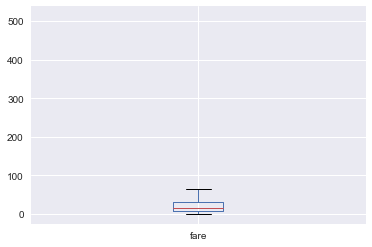

In [281]:
df_titanic_dataset.fare.plot(kind='box')

In [282]:
df_titanic_dataset['sex'] = np.where(df_titanic_dataset.sex == 'male', 1, 0)

In [283]:
df_titanic_dataset.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [284]:
# categorical column : Proprotions
df_titanic_dataset.pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64

In [285]:
# categorical column : Proprotions
df_titanic_dataset.embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

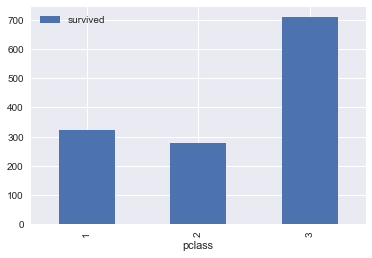

In [286]:
#plt.figure((5,5)
df_titanic_dataset[['pclass','survived']].groupby(['pclass']).count().plot(kind='bar')

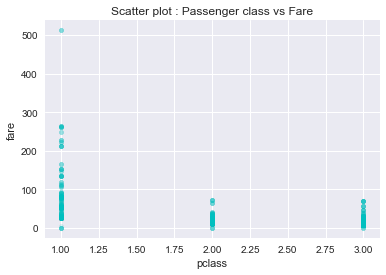

In [287]:
df_titanic_dataset.plot.scatter(x='pclass', y='fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

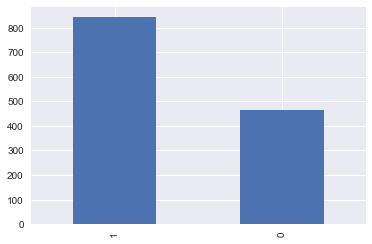

In [288]:
#There should be some numeric data to plot the graph
#For eg: df_titanic_dataset.sex.plot(kind='bar') wont work without providing value_counts

df_titanic_dataset.sex.value_counts().plot(kind='bar')

In [289]:
df_titanic_dataset.fare.max()

512.32920000000001

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002054248AFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020542607518>]], dtype=object)

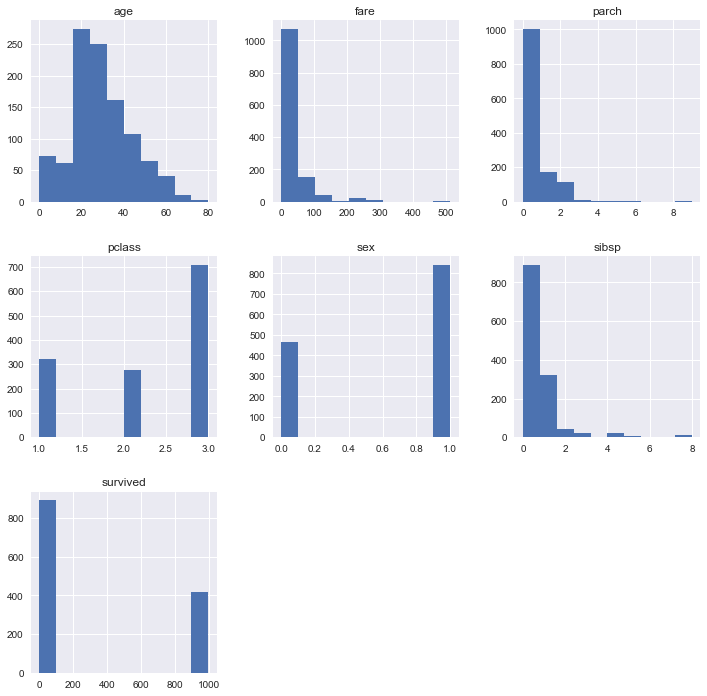

In [290]:
#These plots are generated only for numerical columns

df_titanic_dataset.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020542AA5748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000205428314E0>]], dtype=object)

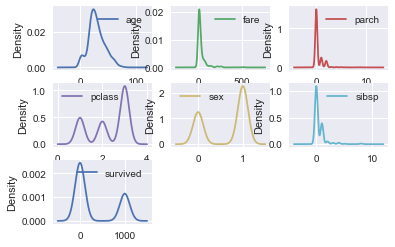

In [291]:
#These plots are generated only for numerical columns

df_titanic_dataset.plot(kind='kde', subplots=True, layout=(3,3), sharex=False)

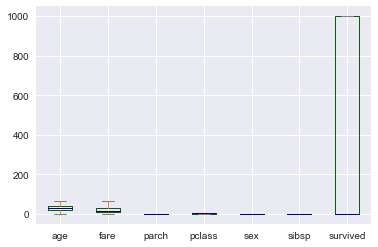

In [292]:
#These plots are generated only for numerical columns

#df_titanic_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df_titanic_dataset.plot.box(color=color, sym='r+')

In [293]:
#df.groupby('Sex').Age.median()

df_titanic_dataset.groupby('sex').age.median()

sex
0    27.0
1    28.0
Name: age, dtype: float64

In [294]:
#Median fare and age by class
df_titanic_dataset.groupby('pclass')['fare','age'].median()

,fare,age
pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [295]:
#Max fare and age by class
df_titanic_dataset.groupby('pclass')['fare','age'].max()

,fare,age
pclass,,
1,512.3292,80.0
2,73.5000,70.0
3,69.5500,74.0


In [296]:
# more complicated aggregations 
aggregations = {
    'fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': min
    },
    'age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}


df_titanic_dataset.groupby(['pclass']).agg(aggregations)

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


fare                                       age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
pclass            
1          79.08  
2          69.33  
3          73.83

In [297]:
pd.crosstab(df_titanic_dataset.sex,df_titanic_dataset.pclass)

pclass,1,2,3
sex,,,
0,144,106,216
1,179,171,493


In [298]:
pd.crosstab(df_titanic_dataset.sex, df_titanic_dataset.pclass,margins=True, aggfunc=[np.median], values=df_titanic_dataset.fare)

median                           
pclass         1        2        3      All
sex                                        
0       80.92915  23.0000  10.4896  23.0000
1       49.50420  13.0000   7.8958  11.8875
All     60.00000  15.0458   8.0500  14.4542

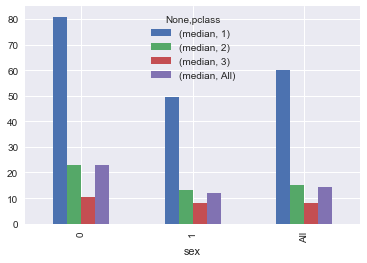

In [299]:
#Fill the cross tab with median values for the cross tab, margin parameter will give overall

pd.crosstab(df_titanic_dataset.sex, df_titanic_dataset.pclass,margins=True, aggfunc=[np.median], values=df_titanic_dataset.fare).plot(kind='bar')

# Data Munging

In [300]:
# use .info() to detect missing values (if any)
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
age         1046 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
fare        1308 non-null float64
name        1309 non-null object
parch       1309 non-null int64
pclass      1309 non-null int64
sex         1309 non-null int32
sibsp       1309 non-null int64
survived    1309 non-null int64
ticket      1309 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 157.6+ KB


In [301]:
df_titanic_dataset[df_titanic_dataset.embarked.isnull()]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,0,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,0,0,1,113572


There are two options to fill the missing values for embarked feature <br>
Option1 : Based on the Survival, since these two passengers survived - checking the maximum number of passengers who survived agaiant the embarkment point.

Option2 : Based on the fare, comparing the fare of these people against the median value of fare paid against each embarkment.

Either of these can be used!

In [302]:
df_titanic_dataset.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [303]:
#Combination of groupby and where clause (condition)

df_titanic_dataset.query("survived != 999").groupby(['survived','embarked'])['survived'].count()

survived  embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: survived, dtype: int64

In [304]:
# which embarked point has higher survival count
pd.crosstab(df_titanic_dataset[df_titanic_dataset.survived != 999].survived, df_titanic_dataset[df_titanic_dataset.survived != 999].embarked)

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


As per Option 1 - 'S' would be the embarked value for the two missing entries.

In [305]:
df_titanic_dataset.groupby(['pclass', 'embarked']).fare.median()

pclass  embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: fare, dtype: float64

As per Option2 'C' is the embarked value for the missing entries as for class 1 the median fare is close to 76 for C.

In [306]:
# replace the missing values with 'C'
df_titanic_dataset.embarked.fillna('C', inplace=True)

In [307]:
df_titanic_dataset[df_titanic_dataset.fare.isnull()]

#df_titanic_dataset[df_titanic_dataset.ticket==3701]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,1,0,999,3701


In [308]:
median_fare = df_titanic_dataset.loc[(df_titanic_dataset.pclass == 3) & (df_titanic_dataset.embarked == 'S'),'fare'].median()
print(median_fare)

8.05


In [309]:
df_titanic_dataset.fare.fillna(median_fare, inplace=True)

In [310]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 10

In [311]:
df_titanic_dataset[df_titanic_dataset.age.isnull()]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,1,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,1,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,0,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,1,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,0,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,0,0,999,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,0,0,999,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,1,0,999,A.5. 3236


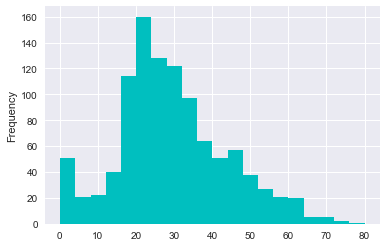

In [312]:
df_titanic_dataset.age.plot(kind='hist', bins=20, color='c');

In [313]:
df_titanic_dataset.age.median()

28.0

In [314]:
df_titanic_dataset.groupby('sex').age.median()

sex
0    27.0
1    28.0
Name: age, dtype: float64

In [315]:
df_titanic_dataset.groupby('sex').age.mean()

sex
0    28.687088
1    30.585228
Name: age, dtype: float64

#There is variation in mean age due to outliers

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


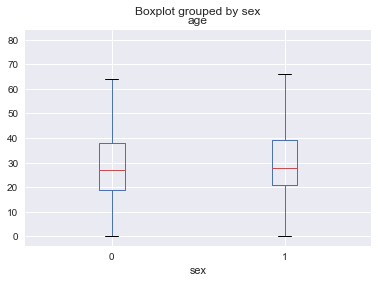

In [316]:
df_titanic_dataset[df_titanic_dataset.age.notnull()].boxplot("age","sex")

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


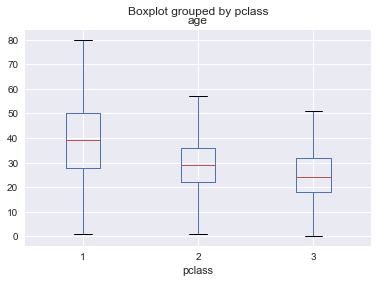

In [317]:
df_titanic_dataset[df_titanic_dataset.age.notnull()].boxplot("age","pclass")

In [318]:
df_titanic_dataset.name

# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [319]:
df_titanic_dataset.name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [320]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' :'Mr',
                   'mrs' : 'Mrs',
                   'miss' : 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir',
                   'mlle' : 'Miss',
                   'col' : 'Officer',
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir',
                   'dona' : 'Lady'
                }
        
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [321]:
#Create Title feature
df_titanic_dataset['title'] = df_titanic_dataset.name.map(lambda x : GetTitle(x))

In [322]:
df_titanic_dataset.head()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket,title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0,373450,Mr


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


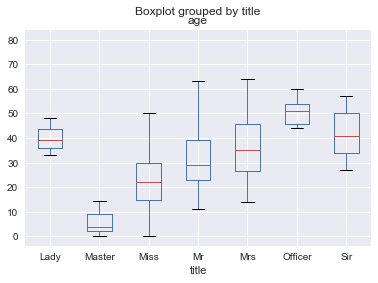

In [323]:
df_titanic_dataset[df_titanic_dataset.age.notnull()].boxplot("age","title")

In [324]:
df_titanic_dataset.groupby("title").age.median()

title
Lady       39.0
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    51.0
Sir        41.0
Name: age, dtype: float64

In [325]:
#Get the median values for each row
df_titanic_dataset.groupby("title").age.transform('median')

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
        ... 
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: age, Length: 1309, dtype: float64

In [326]:
df_titanic_dataset.head()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket,title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0,373450,Mr


In [327]:
title_age_median = df_titanic_dataset.groupby("title").age.transform('median')
df_titanic_dataset.age.fillna(title_age_median,inplace=True)

Working with Outliers

In [328]:
df_titanic_dataset.loc[df_titanic_dataset.fare == df_titanic_dataset.fare.max()]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket,title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,0,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,1,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,1,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,0,0,999,PC 17755,Mrs


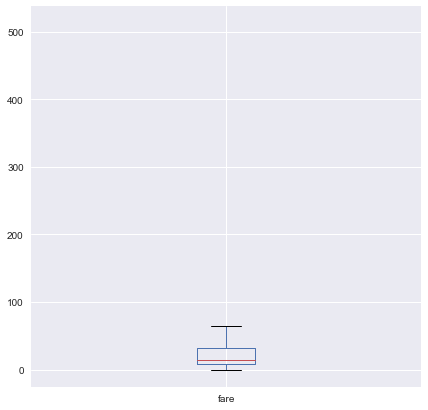

In [329]:
df_titanic_dataset.fare.plot(kind='box',figsize=(7,7));

In a boxplot, the central box represents 50% of the data and the central bar represents the median. The dotted lines with bars on the ends are "whiskers" which encompass the great majority of the data and points beyond the whiskers indicate uncommon values. In this case, we have some uncommon values that are so far away from the typical value that the box appears squashed in the plot: this is a clear indication of outliers. Indeed, it looks like one passenger paid almost twice as much as any other passenger. Even the passengers that paid between 200 and 300 are far higher than the vast majority of the other passengers

In [330]:
df_titanic_dataset['fare_bin']=pd.qcut(df_titanic_dataset.fare, 4,labels=['very_low','low','high','very_high'])


## Age State

In [335]:
df_titanic_dataset['age_state']= np.where(df_titanic_dataset['age']>18, 'Adult','Child')

## Family Size

In [336]:
df_titanic_dataset['familysize']= df_titanic_dataset.parch + df_titanic_dataset.sibsp + 1 #1 for self counting

### Is Mother

In [337]:
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
age           1309 non-null float64
cabin         295 non-null object
embarked      1309 non-null object
fare          1309 non-null float64
name          1309 non-null object
parch         1309 non-null int64
pclass        1309 non-null int64
sex           1309 non-null int32
sibsp         1309 non-null int64
survived      1309 non-null int64
ticket        1309 non-null object
title         1309 non-null object
fare_bin      1309 non-null category
age_state     1309 non-null object
familysize    1309 non-null int64
dtypes: category(1), float64(2), int32(1), int64(5), object(6)
memory usage: 189.8+ KB


In [338]:
df_titanic_dataset['IsMother']=np.where((df_titanic_dataset.sex == 1 ) & (df_titanic_dataset.parch > 0) & (df_titanic_dataset.age_state == 'Adult') & (df_titanic_dataset.title=='Miss'),1,0) 

### Cabin

In [339]:
df_titanic_dataset['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [340]:
df_titanic_dataset.loc[df_titanic_dataset.cabin == 'T',"cabin"] = np.NaN

In [341]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df_titanic_dataset['deck'] = df_titanic_dataset['cabin'].map(lambda x : get_deck(x))

In [342]:
# columns Deck, Pclass, Title, AgeState
df_titanic_dataset = pd.get_dummies(df_titanic_dataset,columns=[ 'deck','pclass','title', 'embarked','age_state','fare_bin'])

In [343]:
#Remove unecessary fields
df_titanic_dataset.drop(['cabin','name','ticket','parch','sibsp'], axis=1,inplace=True)

In [344]:
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
age                   1309 non-null float64
fare                  1309 non-null float64
sex                   1309 non-null int32
survived              1309 non-null int64
familysize            1309 non-null int64
IsMother              1309 non-null int32
deck_A                1309 non-null uint8
deck_B                1309 non-null uint8
deck_C                1309 non-null uint8
deck_D                1309 non-null uint8
deck_E                1309 non-null uint8
deck_F                1309 non-null uint8
deck_G                1309 non-null uint8
deck_Z                1309 non-null uint8
pclass_1              1309 non-null uint8
pclass_2              1309 non-null uint8
pclass_3              1309 non-null uint8
title_Lady            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_M

In [345]:
# reorder columns, move survived column to first
columns = [column for column in df_titanic_dataset.columns if column != 'survived']
columns = ['survived'] + columns
df_titanic_dataset = df_titanic_dataset[columns]

In [346]:
processed_data_path = os.path.join(r"C:\Users\divyakamat",'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

df_titanic_dataset.loc[df_titanic_dataset.survived != 999].to_csv(write_train_path) 
# test data
columns = [column for column in df_titanic_dataset.columns if column != 'survived']
df_titanic_dataset.loc[df_titanic_dataset.survived == 999, columns].to_csv(write_test_path) 

In [347]:
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
survived              1309 non-null int64
age                   1309 non-null float64
fare                  1309 non-null float64
sex                   1309 non-null int32
familysize            1309 non-null int64
IsMother              1309 non-null int32
deck_A                1309 non-null uint8
deck_B                1309 non-null uint8
deck_C                1309 non-null uint8
deck_D                1309 non-null uint8
deck_E                1309 non-null uint8
deck_F                1309 non-null uint8
deck_G                1309 non-null uint8
deck_Z                1309 non-null uint8
pclass_1              1309 non-null uint8
pclass_2              1309 non-null uint8
pclass_3              1309 non-null uint8
title_Lady            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_M

# Building Models

In [348]:
processed_data_path = os.path.join(r"C:\Users\divyakamat",'data','processed')
train_file_path = os.path.join(processed_data_path, 'train.csv')
test_file_path = os.path.join(processed_data_path, 'test.csv')

In [349]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [350]:
train_df.head()

,survived,age,fare,sex,familysize,IsMother,deck_A,deck_B,deck_C,deck_D,...,title_Sir,embarked_C,embarked_Q,embarked_S,age_state_Adult,age_state_Child,fare_bin_high,fare_bin_low,fare_bin_very_high,fare_bin_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,1,2,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1,38.0,71.2833,0,2,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,1,26.0,7.9250,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,1,35.0,53.1000,0,2,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
5,0,35.0,8.0500,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [351]:
X = train_df.loc[:,'age':].as_matrix().astype('float')
y = train_df['survived'].ravel()

In [352]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 32) (712,)
(179, 32) (179,)


In [353]:
# average survival in train and test
print("mean survival in train : {0:.3f}".format(np.mean(y_train)))
print("mean survival in test : {0:.3f}".format(np.mean(y_test)))

mean survival in train : 0.383
mean survival in test : 0.385


In [354]:
import sklearn
sklearn.__version__

'0.19.2'

## Baseline Model

In [119]:
# import function
from sklearn.dummy import DummyClassifier

# create model
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)

# train model
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [120]:
print ('score for baseline model : {0:.2f}'.format(model_dummy.score(X_test, y_test)))

score for baseline model : 0.61


In [121]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_dummy.predict(X_test))))
# confusion matrix
print ('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_dummy.predict(X_test))))
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_dummy.predict(X_test))))
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_dummy.predict(X_test))))

accuracy for baseline model : 0.61
confusion matrix for baseline model: 
 [[110   0]
 [ 69   0]]
precision for baseline model : 0.00
recall for baseline model : 0.00


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
# converting to the matrix
test_X = test_df.as_matrix().astype('float')
# get predictions
predictions = model_dummy.predict(test_X)
df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions} )

In [83]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [85]:
submission_data_path = os.path.join(r"C:\Users\divyakamat",'data','external')
submission_file_path = os.path.join(submission_data_path, '01_dummy.csv')
df_submission.to_csv(submission_file_path, index=False)

## Logistic Regression Model

In [370]:
# import function
from sklearn.linear_model import LogisticRegression

# create model
model_lr_1 = LogisticRegression(random_state=0,C=3.5)

# train model
model_lr_1.fit(X_train,y_train)

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
# evaluate model
print('score for logistic regression - version 1 : {0:.2f}'.format(model_lr_1.score(X_test, y_test)))

score for logistic regression - version 1 : 0.84


In [372]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_lr_1.predict(X_test))))
# confusion matrix
print ('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_lr_1.predict(X_test))))
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_lr_1.predict(X_test))))
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_lr_1.predict(X_test))))

accuracy for baseline model : 0.84
confusion matrix for baseline model: 
 [[96 14]
 [14 55]]
precision for baseline model : 0.80
recall for baseline model : 0.80


In [373]:
# converting to the matrix
test_X = test_df.as_matrix().astype('float')
# get predictions
predictions = model_lr_1.predict(test_df)
df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions} )

In [374]:
# model coefficients
model_lr_1.coef_

array([[-0.03481349,  0.0042637 , -0.98361769, -0.48599834,  0.        ,
         0.13837916, -0.24812305, -0.49616788,  0.57049783,  1.28380323,
         0.54766654, -0.2236505 , -0.34983177,  1.04880749,  0.52785578,
        -0.35408972,  0.57498003,  1.52122954,  0.40080205, -1.53938473,
         1.23040916, -0.15239883, -0.81306368,  0.56535932,  0.49636987,
         0.16084436,  0.64463576,  0.57793779,  0.29281358,  0.29942455,
         0.43283877,  0.19749664]])

In [375]:
submission_data_path = os.path.join(r"C:\Users\divyakamat",'data','external')
submission_file_path = os.path.join(submission_data_path, '02_lr.csv')

df_submission.to_csv(submission_file_path, index=False)

# Decision Tree Model

In [377]:
from sklearn import tree

model_dr_1 = tree.DecisionTreeClassifier()

# train model
model_dr_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [379]:
# evaluate model
print('score for logistic regression - version 1 : {0:.2f}'.format(model_dr_1.score(X_test, y_test)))

score for logistic regression - version 1 : 0.74


In [380]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_dr_1.predict(X_test))))
# confusion matrix
print ('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_dr_1.predict(X_test))))
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_dr_1.predict(X_test))))
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_dr_1.predict(X_test))))

accuracy for baseline model : 0.74
confusion matrix for baseline model: 
 [[87 23]
 [23 46]]
precision for baseline model : 0.67
recall for baseline model : 0.67
